# Before embarking on Pandas 

- Before we learn about dataframes, we need to quickly learn about lambda functions
- Lambda functions are a nice feature of Python as they allow you a way to write a function that you'll only really use once.
- `lambda variable: expression`
- A good cheatsheet from Stata to python can be found here:
    - https://cheatsheets.quantecon.org/stats-cheatsheet.html

In [23]:
sum_func = lambda x: x+1

sum_func(3)

4

-  As we'll see in a bit, we can use lambda functions to make new variables in a pandas dataframe.
- Only in this case, the `x` would refer to an observation in a variable.
    - It will make more sense in a bit.

## Pandas 

- Pandas is a data library for Python, which is based on the idea of "dataframes" 
- You can think of a dataframe as a souped up dictionary or list
- As in, a pandas dataframe has methods that are statistics specific
    - Calling a subset yields another dataframe
    - means, variances, sums
    - data merging
    - checking and filling in missing values
    - plotting data
    - Creating more "columns" using already existing columns

## What is a dataframe?

- A Pandas dataframe is made up of: columns, rows and an index
- column = variable
- row = obervation
- index is how we count the observations
    - we can use indexes in more complicated ways later
    - Foreshadowing: panel data
        - Household, year data
- A "vector" of data is called a pandas "Series"
    - It's still part of pandas, but doesn't have exactly the same capabilities
    - A full dataframe is made up of many series put together
    

In [2]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

## Loading Data

- Pandas allows loading in different data types:
    - csv, xlsx, dta, sas
    - as well as more memory efficient and big data files like feathers and arrows

In [28]:
## Load in raw_data
raw_df = pd.read_csv("https://raw.githubusercontent.com/lordflaron/ARE106data/master/lawsch85.csv")
raw_df

# pd.read_csv
# pd.read_sas
# pd.read_stata
# pd.read_html
# pd.read_feather/ pd.read_hdf5/ pd.read_parquet



,Unnamed: 0,rank,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,north,south,east,west,studfac,top10,r11_25,r26_40,r41_60
0,0,128,31400.0,8340.0,155.0,3.15,216.0,45.0,12.0,210.0,1,0,0,0,4.666667,0,0,0,0
1,1,104,33098.0,6980.0,160.0,3.50,256.0,44.0,113.0,190.0,0,1,0,0,4.318182,0,0,0,0
2,2,34,32870.0,16370.0,155.0,3.25,424.0,78.0,134.0,270.0,0,0,1,0,3.461539,0,0,1,0
3,3,49,35000.0,17566.0,157.0,3.20,329.0,136.0,89.0,277.0,0,0,1,0,2.036765,0,0,0,1
4,4,95,33606.0,8350.0,162.0,3.38,332.0,56.0,70.0,150.0,0,0,0,1,2.678571,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,17,49321.0,13530.0,162.0,3.34,300.0,50.0,206.0,178.0,0,0,1,0,3.560000,0,1,0,0
152,152,21,49900.0,11334.0,161.0,3.40,NaN,47.0,NaN,285.0,1,0,0,0,6.063830,0,1,0,0
153,153,143,31500.0,7396.0,157.0,3.40,174.0,17.0,65.0,79.0,0,0,0,1,4.647059,0,0,0,0
154,154,3,69000.0,19780.0,171.0,3.82,850.0,100.0,140.0,101.0,0,0,1,0,1.010000,1,0,0,0


## The Columns and the Index

- In Pandas, there are columns and an index. 
- The columns are names for variables and the index names the rows
- The index right now is just a range of numbers
    - But you can make *another* variable your index and on multiple dimensions
    - So you can index your data by say, household and time, 
    - particularly useful for panel regression

In [10]:
raw_df.columns


Index(['Unnamed: 0', 'rank', 'salary', 'cost', 'LSAT', 'GPA', 'libvol',
       'faculty', 'age', 'clsize', 'north', 'south', 'east', 'west', 'studfac',
       'top10', 'r11_25', 'r26_40', 'r41_60'],
      dtype='object')

In [8]:
raw_df.index


RangeIndex(start=0, stop=156, step=1)

- To get just a snippet of data, we can use the `head()` and `tail()` methods
    - `head()` gets us the first observations
    - `tail()` get us the last observations
    - The default is 5, but can we change that by using the `n` option

In [12]:
raw_df.head(n=10)


,Unnamed: 0,rank,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,north,south,east,west,studfac,top10,r11_25,r26_40,r41_60
0,0,128,31400.0,8340.0,155.0,3.15,216.0,45.0,12.0,210.0,1,0,0,0,4.666667,0,0,0,0
1,1,104,33098.0,6980.0,160.0,3.50,256.0,44.0,113.0,190.0,0,1,0,0,4.318182,0,0,0,0
2,2,34,32870.0,16370.0,155.0,3.25,424.0,78.0,134.0,270.0,0,0,1,0,3.461539,0,0,1,0
3,3,49,35000.0,17566.0,157.0,3.20,329.0,136.0,89.0,277.0,0,0,1,0,2.036765,0,0,0,1
4,4,95,33606.0,8350.0,162.0,3.38,332.0,56.0,70.0,150.0,0,0,0,1,2.678571,0,0,0,0
5,5,98,31700.0,8350.0,161.0,3.40,311.0,40.0,29.0,156.0,0,0,0,1,3.900000,0,0,0,0
6,6,124,30410.0,6020.0,155.0,3.16,220.0,40.0,61.0,151.0,0,1,0,0,3.775000,0,0,0,0
7,7,157,30150.0,5986.0,152.0,3.12,230.0,45.0,60.0,149.0,0,1,0,0,3.311111,0,0,0,0
8,8,145,31300.0,4785.0,155.0,3.12,230.0,101.0,70.0,322.0,0,0,1,0,3.188119,0,0,0,0
9,9,91,33200.0,7680.0,160.0,3.66,157.0,44.0,128.0,70.0,0,1,0,0,1.590909,0,0,0,0


In [13]:
raw_df.tail(n=10)

,Unnamed: 0,rank,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,north,south,east,west,studfac,top10,r11_25,r26_40,r41_60
146,146,67,35000.0,6700.0,158.0,3.35,415.0,66.0,58.0,234.0,1,0,0,0,3.545455,0,0,0,0
147,147,135,27900.0,11775.0,153.0,3.08,301.0,59.0,NaN,251.0,0,0,1,0,4.254237,0,0,0,0
148,148,156,29630.0,15960.0,155.0,3.00,230.0,40.0,10.0,247.0,0,0,0,1,6.175000,0,0,0,0
149,149,138,29750.0,14200.0,154.0,3.10,481.0,206.0,NaN,679.0,0,0,1,0,3.296117,0,0,0,0
150,150,66,36000.0,12800.0,157.0,3.20,244.0,39.0,102.0,182.0,0,0,1,0,4.666667,0,0,0,0
151,151,17,49321.0,13530.0,162.0,3.34,300.0,50.0,206.0,178.0,0,0,1,0,3.560000,0,1,0,0
152,152,21,49900.0,11334.0,161.0,3.40,NaN,47.0,NaN,285.0,1,0,0,0,6.063830,0,1,0,0
153,153,143,31500.0,7396.0,157.0,3.40,174.0,17.0,65.0,79.0,0,0,0,1,4.647059,0,0,0,0
154,154,3,69000.0,19780.0,171.0,3.82,850.0,100.0,140.0,101.0,0,0,1,0,1.010000,1,0,0,0
155,155,120,29800.0,12870.0,NaN,NaN,200.0,35.0,NaN,327.0,1,0,0,0,9.342857,0,0,0,0


- To get a look at just one variable, you can do it one of two ways:
    - `raw_df.variable`
    - `raw_df['variable']`
        - Sort of like a dictionary!
    - if there are spaces in the variable name (there usually shouldn't be though), use the second
    


In [18]:
raw_df['salary']

0      31400.0
1      33098.0
2      32870.0
3      35000.0
4      33606.0
        ...   
151    49321.0
152    49900.0
153    31500.0
154    69000.0
155    29800.0
Name: salary, Length: 156, dtype: float64

In [19]:
raw_df['salary'].head()

0    31400.0
1    33098.0
2    32870.0
3    35000.0
4    33606.0
Name: salary, dtype: float64

- If you wanted to get just some variables (a subset), you can use a sort of slicing notation



In [20]:
subset = ['salary', 'GPA']
raw_df[subset].head()

,salary,GPA
0,31400.0,3.15
1,33098.0,3.50
2,32870.0,3.25
3,35000.0,3.20
4,33606.0,3.38


In [22]:
raw_df[['salary', 'GPA']].describe()

,salary,GPA
count,148.000000,149.000000
mean,38946.716216,3.302752
std,12188.840435,0.199776
min,24900.000000,2.730000
25%,29950.000000,3.200000
50%,34725.000000,3.300000
75%,41350.000000,3.410000
max,78325.000000,3.820000


## Assigning a new column (variable)

- Now let's think about how to make a new variable
- Sometimes we might need to do that
    - Like in the homework, for example
- How would we do the $1000*x$ operation in `pandas`?
- Note: remember about *inplace* operations
- assigning a new variable won't actually change the raw data itself

In [38]:
raw_df.assign(salary_times_thousand = lambda x: x['salary']*1000, inplace=True)

# df = raw_df.copy(deep=True)
# df['salary_times_thousand'] = df['salary']*1000
# df
# raw_df
df = (
    raw_df
    .assign(salary_times_thousand = lambda df: df['salary']*1000)
    )


In [39]:
raw_df['salary_times_thousand']


KeyError: 'salary_times_thousand'

In [51]:
df = (
    raw_df
    .assign(salary_times_thousand = lambda x: x['salary']*1000,
            gpa_ten  = lambda dfdfd: dfdfd['GPA']*10,
            gpa_salary = lambda df: df['gpa_ten']*df['salary'])
    # .mean()
    )

df

,Unnamed: 0,rank,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,...,east,west,studfac,top10,r11_25,r26_40,r41_60,salary_times_thousand,gpa_ten,gpa_salary
0,0,128,31400.0,8340.0,155.0,3.15,216.0,45.0,12.0,210.0,...,0,0,4.666667,0,0,0,0,31400000.0,31.5,989100.0
1,1,104,33098.0,6980.0,160.0,3.50,256.0,44.0,113.0,190.0,...,0,0,4.318182,0,0,0,0,33098000.0,35.0,1158430.0
2,2,34,32870.0,16370.0,155.0,3.25,424.0,78.0,134.0,270.0,...,1,0,3.461539,0,0,1,0,32870000.0,32.5,1068275.0
3,3,49,35000.0,17566.0,157.0,3.20,329.0,136.0,89.0,277.0,...,1,0,2.036765,0,0,0,1,35000000.0,32.0,1120000.0
4,4,95,33606.0,8350.0,162.0,3.38,332.0,56.0,70.0,150.0,...,0,1,2.678571,0,0,0,0,33606000.0,33.8,1135882.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,17,49321.0,13530.0,162.0,3.34,300.0,50.0,206.0,178.0,...,1,0,3.560000,0,1,0,0,49321000.0,33.4,1647321.4
152,152,21,49900.0,11334.0,161.0,3.40,NaN,47.0,NaN,285.0,...,0,0,6.063830,0,1,0,0,49900000.0,34.0,1696600.0
153,153,143,31500.0,7396.0,157.0,3.40,174.0,17.0,65.0,79.0,...,0,1,4.647059,0,0,0,0,31500000.0,34.0,1071000.0
154,154,3,69000.0,19780.0,171.0,3.82,850.0,100.0,140.0,101.0,...,1,0,1.010000,1,0,0,0,69000000.0,38.2,2635800.0


## Dropping Variables

- In pandas, we can drop by the index, or drop a column

In [57]:
## Drop by index

df.drop(index=0)

# Drop by column

df.drop(columns = ['rank', 'Unnamed: 0'])

## Remember that this is not an inplace operation...


,salary,cost,LSAT,GPA,libvol,faculty,age,clsize,north,south,east,west,studfac,top10,r11_25,r26_40,r41_60,salary_times_thousand,gpa_ten,gpa_salary
0,31400.0,8340.0,155.0,3.15,216.0,45.0,12.0,210.0,1,0,0,0,4.666667,0,0,0,0,31400000.0,31.5,989100.0
1,33098.0,6980.0,160.0,3.50,256.0,44.0,113.0,190.0,0,1,0,0,4.318182,0,0,0,0,33098000.0,35.0,1158430.0
2,32870.0,16370.0,155.0,3.25,424.0,78.0,134.0,270.0,0,0,1,0,3.461539,0,0,1,0,32870000.0,32.5,1068275.0
3,35000.0,17566.0,157.0,3.20,329.0,136.0,89.0,277.0,0,0,1,0,2.036765,0,0,0,1,35000000.0,32.0,1120000.0
4,33606.0,8350.0,162.0,3.38,332.0,56.0,70.0,150.0,0,0,0,1,2.678571,0,0,0,0,33606000.0,33.8,1135882.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,49321.0,13530.0,162.0,3.34,300.0,50.0,206.0,178.0,0,0,1,0,3.560000,0,1,0,0,49321000.0,33.4,1647321.4
152,49900.0,11334.0,161.0,3.40,NaN,47.0,NaN,285.0,1,0,0,0,6.063830,0,1,0,0,49900000.0,34.0,1696600.0
153,31500.0,7396.0,157.0,3.40,174.0,17.0,65.0,79.0,0,0,0,1,4.647059,0,0,0,0,31500000.0,34.0,1071000.0
154,69000.0,19780.0,171.0,3.82,850.0,100.0,140.0,101.0,0,0,1,0,1.010000,1,0,0,0,69000000.0,38.2,2635800.0


## Getting Unique Values and Value Counts

- similar to `tab` in Stata

In [65]:
df[['north', 'south', 'west', 'east']].idxmax(axis='columns')

0      north
1      south
2       east
3       east
4       west
       ...  
151     east
152    north
153     west
154     east
155    north
Length: 156, dtype: object

In [66]:
# Get unique and nunique values
(
    df
    .assign(area = lambda x: x[['north', 'south', 'east', 'west']].idxmax(axis=1))
    ['area']
    .unique()
    ) # ignore the middle part for now

array(['north', 'south', 'east', 'west'], dtype=object)

In [70]:
df['salary'].unique()

array([31400., 33098., 32870., 35000., 33606., 31700., 30410., 30150.,
       31300., 33200., 34900., 55413., 33750., 65000.,    nan, 62000.,
       63000., 28500., 30100., 33650., 40325., 70000., 32800., 78325.,
       67500., 29800., 28900., 42300., 32900., 29200., 34500., 32300.,
       60172., 32093., 46103., 33900., 64880., 29336., 61000., 62705.,
       45889., 34130., 34400., 67815., 30580., 51082., 39000., 29500.,
       27000., 40000., 50000., 31000., 26000., 30000., 36000., 33000.,
       29750., 34750., 29640., 28420., 39500., 38000., 42000., 39900.,
       49862., 40591., 36900., 34000., 34700., 56200., 28800., 28000.,
       67000., 53177., 29699., 41300., 34800., 24900., 30135., 37600.,
       39800., 29700., 41000., 38750., 29650., 52000., 30050., 29000.,
       41150., 29499., 59500., 35500., 29799., 29600., 25000., 49000.,
       57000., 29669., 37000., 64000., 51490., 41500., 27900., 29630.,
       49321., 49900., 31500., 69000.])

In [71]:
# Get nunique
df['rank'].nunique()

154

In [75]:
# get value counts
df['area'].value_counts()

KeyError: 'area'

## Dealing with Missing Values

In [78]:
# Pandas uses NaN as a marker for missing values
df_with_missing = df.assign(bad_variable = lambda x: np.random.choice([1, 0, np.nan], size=x.shape[0]))

df_with_missing.bad_variable


0      0.0
1      0.0
2      1.0
3      1.0
4      NaN
      ... 
151    NaN
152    1.0
153    NaN
154    NaN
155    NaN
Name: bad_variable, Length: 156, dtype: float64

- You can drop missing values
- fill them with something else

In [84]:
print(df_with_missing.shape)
print(df_with_missing.dropna(how='all').shape)

print(df_with_missing.dropna( how='any').shape)

print(df_with_missing.dropna( how='any', axis=0).shape)

print(df_with_missing.dropna( how='any', axis=1).shape)

print(df_with_missing.dropna(subset=['bad_variable']).shape)

(156, 23)
(156, 23)
(58, 23)
(58, 23)
(156, 10)
(100, 23)


In [86]:
df_with_missing['bad_variable'].value_counts(dropna=False)

NaN    56
0.0    51
1.0    49
Name: bad_variable, dtype: int64

In [87]:
(
    df_with_missing
    .fillna({'bad_variable' : 0})
    ['bad_variable']
    .value_counts(dropna=False)
    )

0.0    107
1.0     49
Name: bad_variable, dtype: int64

In [88]:
df_with_missing['bad_variable'].fillna(0)

0      0.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
151    0.0
152    1.0
153    0.0
154    0.0
155    0.0
Name: bad_variable, Length: 156, dtype: float64

In [90]:
(
    df_with_missing
    .fillna({'bad_variable' : df_with_missing['LSAT']})
    ['bad_variable']
    .value_counts(dropna=False)
    )

0.0      51
1.0      49
160.0     8
154.0     6
155.0     6
156.0     4
162.0     4
163.0     3
NaN       3
152.0     3
161.0     3
159.0     3
164.0     2
158.0     2
157.0     2
153.0     2
168.0     1
169.0     1
165.0     1
145.0     1
171.0     1
Name: bad_variable, dtype: int64

## Index and MultiIndex in pandas

- In pandas you can index the rows of a dataframe by a variable. 
- This is great when you have hierarchical data
    - This can also be done for columns


In [6]:
# create a household-year panel
multi_index = pd.MultiIndex.from_product([range(10), range(2002, 2020)], names = ['hhid', 'year'])

hh_panel = pd.DataFrame(index=multi_index, columns = ['income', 'poverty'], 
             data = np.array([np.random.uniform(0,100,size=180), np.random.choice([0,1], size=180)]).T).reset_index()

In [10]:
hh_panel

,hhid,year,income,poverty
0,0,2002,95.465845,0.0
1,0,2003,5.574751,0.0
2,0,2004,73.124283,1.0
3,0,2005,19.690174,1.0
4,0,2006,76.267719,0.0
...,...,...,...,...
175,9,2015,3.245202,0.0
176,9,2016,3.914726,1.0
177,9,2017,25.866798,0.0
178,9,2018,13.241525,0.0


In [11]:
hh_panel.set_index(['hhid', 'year'])

income  poverty
hhid year                    
0    2002  95.465845      0.0
     2003   5.574751      0.0
     2004  73.124283      1.0
     2005  19.690174      1.0
     2006  76.267719      0.0
...              ...      ...
9    2015   3.245202      0.0
     2016   3.914726      1.0
     2017  25.866798      0.0
     2018  13.241525      0.0
     2019  54.654675      0.0

[180 rows x 2 columns]

In [13]:
hh_panel.set_index('hhid').set_index('year', append=True)

income  poverty
hhid year                    
0    2002  95.465845      0.0
     2003   5.574751      0.0
     2004  73.124283      1.0
     2005  19.690174      1.0
     2006  76.267719      0.0
...              ...      ...
9    2015   3.245202      0.0
     2016   3.914726      1.0
     2017  25.866798      0.0
     2018  13.241525      0.0
     2019  54.654675      0.0

[180 rows x 2 columns]

## Stacking and Unstacking

- Stacking and unstacking are a way to create wide data (similar to `reshape`)
- There's also `pivot`, but `unstack` usually all you need.

In [19]:
hh_panel.set_index(['hhid', 'year']).unstack() #by default, level=1
unstacked_hh_panel = hh_panel.set_index(['hhid', 'year']).unstack(level='hhid')
unstacked_hh_panel.stack()

income  poverty
year hhid                    
2002 0     95.465845      0.0
     1     74.259485      0.0
     2     95.840036      1.0
     3      7.150850      0.0
     4     23.735135      0.0
...              ...      ...
2019 5     67.571518      1.0
     6     84.806783      1.0
     7     62.727091      0.0
     8     24.731157      0.0
     9     54.654675      0.0

[180 rows x 2 columns]

- Now the columns are also a multiindex!
- To get get an observation from a multiindex, we use `loc`


In [21]:
unstacked_hh_panel

income                                                         \
hhid          0          1          2          3          4          5   
year                                                                     
2002  95.465845  74.259485  95.840036   7.150850  23.735135  74.893505   
2003   5.574751  90.429790  22.450171  85.099430  95.508158  47.413348   
2004  73.124283  49.946530   8.580992  82.693136  42.242536  97.028276   
2005  19.690174  68.991757  26.234428  18.266088  24.585340  16.914363   
2006  76.267719  63.248114  76.993092  67.599040   2.376811  82.983567   
2007  45.667833  29.322417  96.821351  93.085655  12.812553  81.644646   
2008  59.512803   4.120353  44.745535  83.672518  15.231945   6.304327   
2009  69.354412  67.348289  93.310516  13.827909  53.038420  62.269891   
2010  36.056236  80.338851  51.738242  28.726464  28.814833  74.183224   
2011  61.791127  94.605045  62.045656  24.672153  41.691425  66.971138   
2012  65.147674  83.972034  27.531209  86.749456  31.267798  94.958626   
2013  55.396074  29.412971  24.363258  55.846331  23.353592  18.116093   
2014  97.402415  99.992392  50.861846  97.773901  48.713920  37.060286   
2015  23.382113  93.625521   4.337300  57.548624  61.077684  57.172862   
2016   4.527147  72.053000  17.720119  18.546774  82.841630  24.817877   
2017  95.558503   6.031119  71.836232  81.609753  46.749500  42.517237   
2018  47.136052  49.801349  41.560301  14.628130  66.442522  34.608841   
2019   5.427153  68.704664  51.233892  46.990155  59.147304  67.571518   

                                                 poverty                      \
hhid          6          7          8          9       0    1    2    3    4   
year                                                                           
2002  52.037207  65.862177  88.550382  38.460881     0.0  0.0  1.0  0.0  0.0   
2003  24.575878  51.052388   0.035680  71.215346     0.0  1.0  0.0  1.0  1.0   
2004  32.170604  66.938825  27.949460  23.581412     1.0  1.0  1.0  1.0  1.0   
2005  33.527456  75.872529  71.839392  99.547135     1.0  1.0  0.0  1.0  1.0   
2006  74.338504  39.421243  45.066537  25.895976     0.0  1.0  0.0  0.0  0.0   
2007  95.190653  24.827791  49.973166  77.260297     1.0  0.0  0.0  0.0  0.0   
2008  82.771242  72.563703  78.408638  12.388043     1.0  0.0  1.0  0.0  0.0   
2009  42.007937  87.814004  72.016251  15.350019     1.0  0.0  0.0  1.0  0.0   
2010  18.831579  93.220973  11.921336   1.038654     1.0  1.0  0.0  0.0  0.0   
2011  80.605970  95.475917  14.248906  11.947292     1.0  1.0  1.0  1.0  0.0   
2012  99.827125  97.438285  23.109718  15.010012     0.0  1.0  1.0  0.0  0.0   
2013  33.208311  70.145162  13.014062  76.294783     0.0  1.0  1.0  0.0  0.0   
2014  53.960170  95.388474  17.180504  68.317180     0.0  1.0  0.0  1.0  0.0   
2015  99.204019  42.240520  69.119656   3.245202     1.0  0.0  1.0  0.0  0.0   
2016  86.618378  50.700741  57.346351   3.914726     1.0  1.0  0.0  1.0  1.0   
2017  13.011941  73.430137  97.105003  25.866798     0.0  0.0  0.0  0.0  0.0   
2018  45.495935  19.084196  56.876673  13.241525     0.0  0.0  1.0  0.0  1.0   
2019  84.806783  62.727091  24.731157  54.654675     1.0  1.0  0.0  0.0  0.0   

                               
hhid    5    6    7    8    9  
year                           
2002  1.0  1.0  0.0  1.0  1.0  
2003  1.0  1.0  0.0  1.0  0.0  
2004  1.0  1.0  0.0  1.0  1.0  
2005  1.0  0.0  1.0  1.0  0.0  
2006  1.0  1.0  1.0  1.0  1.0  
2007  0.0  1.0  0.0  0.0  1.0  
2008  1.0  1.0  0.0  0.0  0.0  
2009  1.0  1.0  1.0  0.0  1.0  
2010  1.0  1.0  0.0  1.0  1.0  
2011  0.0  0.0  0.0  1.0  0.0  
2012  0.0  1.0  0.0  1.0  1.0  
2013  1.0  1.0  1.0  1.0  1.0  
2014  1.0  0.0  1.0  1.0  0.0  
2015  0.0  1.0  1.0  0.0  0.0  
2016  1.0  0.0  1.0  0.0  1.0  
2017  1.0  0.0  0.0  1.0  0.0  
2018  1.0  0.0  1.0  1.0  0.0  
2019  1.0  1.0  0.0  0.0  0.0

In [20]:
unstacked_hh_panel.loc[2002, 'income']

hhid
0    95.465845
1    74.259485
2    95.840036
3     7.150850
4    23.735135
5    74.893505
6    52.037207
7    65.862177
8    88.550382
9    38.460881
Name: 2002, dtype: float64

In [22]:
unstacked_hh_panel.loc[2002, ('income', 1)]

74.25948490567946

In [25]:
unstacked_hh_panel['income']

hhid,0,1,2,3,4,5,6,7,8,9
year,,,,,,,,,,
2002,95.465845,74.259485,95.840036,7.150850,23.735135,74.893505,52.037207,65.862177,88.550382,38.460881
2003,5.574751,90.429790,22.450171,85.099430,95.508158,47.413348,24.575878,51.052388,0.035680,71.215346
2004,73.124283,49.946530,8.580992,82.693136,42.242536,97.028276,32.170604,66.938825,27.949460,23.581412
2005,19.690174,68.991757,26.234428,18.266088,24.585340,16.914363,33.527456,75.872529,71.839392,99.547135
2006,76.267719,63.248114,76.993092,67.599040,2.376811,82.983567,74.338504,39.421243,45.066537,25.895976
2007,45.667833,29.322417,96.821351,93.085655,12.812553,81.644646,95.190653,24.827791,49.973166,77.260297
2008,59.512803,4.120353,44.745535,83.672518,15.231945,6.304327,82.771242,72.563703,78.408638,12.388043
2009,69.354412,67.348289,93.310516,13.827909,53.038420,62.269891,42.007937,87.814004,72.016251,15.350019
2010,36.056236,80.338851,51.738242,28.726464,28.814833,74.183224,18.831579,93.220973,11.921336,1.038654


## Querying Data and Making Subsets

-  Creating subsets of data is something you will constantly need to do in data analysis
- There are many ways to do it in pandas, but the easiest way is `query`

In [28]:
# get the second observation
hh_panel.iloc[1]

# Get everything but the last observation
hh_panel.iloc[:-1]

# # get only data after 2006
hh_panel.loc[lambda x: x['income']>50]


,hhid,year,income,poverty
0,0,2002,95.465845,0.0
2,0,2004,73.124283,1.0
4,0,2006,76.267719,0.0
6,0,2008,59.512803,1.0
7,0,2009,69.354412,1.0
...,...,...,...,...
165,9,2005,99.547135,0.0
167,9,2007,77.260297,1.0
173,9,2013,76.294783,1.0
174,9,2014,68.317180,0.0


-  But with query, thing are a lot easier and it lets us write out expressions much more easily and faster!

In [32]:
x = 70
# `income tomorrow`
hh_panel.query("income > @x and poverty == 1 and year ==2005 and hhid != 4")

,hhid,year,income,poverty
129,7,2005,75.872529,1.0
147,8,2005,71.839392,1.0


## Apply and Transform

- If we need to manipulate data somehow, we can use `apply`
- Note that this depends on the axis argument.
    - By default, pandas works on each *row*, taking it as a vector (axis=0)

In [37]:
hh_panel.apply(lambda x: x*1000)

hh_panel.apply(lambda x: x['income']*1000, axis=1)

hh_panel.assign(thousand_rank = lambda df: df['income'].apply(lambda x: x*1000)) # same as just df['income']*1000


,hhid,year,income,poverty,thousand_rank
0,0,2002,95.465845,0.0,95465.845044
1,0,2003,5.574751,0.0,5574.750622
2,0,2004,73.124283,1.0,73124.282899
3,0,2005,19.690174,1.0,19690.173535
4,0,2006,76.267719,0.0,76267.718757
...,...,...,...,...,...
175,9,2015,3.245202,0.0,3245.202154
176,9,2016,3.914726,1.0,3914.725581
177,9,2017,25.866798,0.0,25866.797810
178,9,2018,13.241525,0.0,13241.524664


# Groupby and grouping data

- Let's say you wanted to group data by household, and get statistics

In [40]:
hh_panel.groupby('hhid')

In [43]:
hh_panel.groupby('hhid')[['income', 'poverty']].mean()

,income,poverty
hhid,,
0,52.026795,0.555556
1,62.566871,0.611111
2,48.233565,0.444444
3,53.582576,0.388889
4,42.201728,0.277778
5,54.857201,0.777778
6,58.454983,0.666667
7,65.789120,0.444444
8,45.471826,0.666667


In [49]:
hh_panel.groupby('year')[['income', 'poverty']].mean()

,income,poverty
year,,
2002,61.625550,0.5
2003,49.335494,0.6
2004,50.425605,0.9
2005,45.546866,0.7
2006,55.419060,0.6
2007,60.660636,0.3
2008,45.971911,0.4
2009,57.633765,0.6
2010,42.487039,0.6


In [57]:
hh_panel.groupby('year')[['income', 'poverty']].agg(['mean', 'std', 'median'])

income                       poverty                 
           mean        std     median    mean       std median
year                                                          
2002  61.625550  30.597861  70.060831     0.5  0.527046    0.5
2003  49.335494  35.381130  49.232868     0.6  0.516398    1.0
2004  50.425605  28.631986  46.094533     0.9  0.316228    1.0
2005  45.546866  30.306007  29.880942     0.7  0.483046    1.0
2006  55.419060  26.406431  65.423577     0.6  0.516398    1.0
2007  60.660636  31.905591  63.616731     0.3  0.483046    0.0
2008  45.971911  33.528666  52.129169     0.4  0.516398    0.0
2009  57.633765  27.112778  64.809090     0.6  0.516398    1.0
2010  42.487039  31.138354  32.435535     0.6  0.516398    1.0
2011  55.405463  31.110973  61.918391     0.5  0.527046    0.5
2012  62.501194  34.526664  74.559854     0.5  0.527046    0.5
2013  39.915064  22.610431  31.310641     0.7  0.483046    1.0
2014  66.665109  29.645279  61.138675     0.5  0.527046    0.5
2015  51.095350  33.247801  57.360743     0.4  0.516398    0.0
2016  41.908674  31.907237  37.759309     0.7  0.483046    1.0
2017  55.371622  33.302039  59.292866     0.2  0.421637    0.0
2018  38.887553  18.189027  43.528118     0.5  0.527046    0.5
2019  52.599439  22.866076  56.900989     0.4  0.516398    0.0

In [53]:
hh_panel.groupby('year')[['income', 'poverty']].agg(income_mean = ('income', 'mean'),
                                                    povert_median = ('poverty', 'median'))

,income_mean,povert_median
year,,
2002,61.625550,0.5
2003,49.335494,1.0
2004,50.425605,1.0
2005,45.546866,1.0
2006,55.419060,1.0
2007,60.660636,0.0
2008,45.971911,0.0
2009,57.633765,1.0
2010,42.487039,1.0


- Groupby lets you break up the data into groups and manipulate what's happening
- You can also use apply in that situation, but note that groupby will take each group as a vector!

In [54]:
hh_panel.groupby('hhid').ngroups

10

In [56]:
hh_panel.groupby('hhid').apply(lambda x: (x - x.mean())/x.std())

,hhid,year,income,poverty
0,NaN,-1.592196,1.403715,-1.086534
1,NaN,-1.404879,-1.501079,-1.086534
2,NaN,-1.217562,0.681757,0.869227
3,NaN,-1.030244,-1.044945,0.869227
4,NaN,-0.842927,0.783335,-1.086534
...,...,...,...,...
175,NaN,0.842927,-1.041647,-0.971825
176,NaN,1.030244,-1.019959,0.971825
177,NaN,1.217562,-0.308864,-0.971825
178,NaN,1.404879,-0.717835,-0.971825


In [59]:
# You can also get group specific statistics, but cast back to the original data
hh_panel.groupby('hhid')[['income', 'poverty']].transform('mean')

# you can do this to create new variables
hh_panel.assign(hhid_income_mean = lambda df: df.groupby('hhid')['income'].transform('mean'))

,hhid,year,income,poverty,hhid_income_mean
0,0,2002,95.465845,0.0,52.026795
1,0,2003,5.574751,0.0,52.026795
2,0,2004,73.124283,1.0,52.026795
3,0,2005,19.690174,1.0,52.026795
4,0,2006,76.267719,0.0,52.026795
...,...,...,...,...,...
175,9,2015,3.245202,0.0,35.401664
176,9,2016,3.914726,1.0,35.401664
177,9,2017,25.866798,0.0,35.401664
178,9,2018,13.241525,0.0,35.401664


## Piping and Using Functions

-  Everything we just discussed can also be used with functions
- apply, transform, agg...
- If your operation can't be done readably in a one-line lambda function, this is usually a good idea.
- Note that you should know what the function should be taking in as input
    - an apply will take a vector/series as input
    - pipe should take a dataframe

In [60]:
def add_n(x, n=1):
    return x + n

In [61]:
def weighted_mean(x, weights):
    return np.sum(x*weights)/np.sum(weights)


In [63]:
(
    hh_panel
    .assign(weights = np.random.uniform(size=180))
    .apply(add_n, 1)
    )

,hhid,year,income,poverty,weights
0,1.0,2003.0,96.465845,1.0,1.435456
1,1.0,2004.0,6.574751,1.0,1.542754
2,1.0,2005.0,74.124283,2.0,1.942309
3,1.0,2006.0,20.690174,2.0,1.982836
4,1.0,2007.0,77.267719,1.0,1.644476
...,...,...,...,...,...
175,10.0,2016.0,4.245202,1.0,1.032519
176,10.0,2017.0,4.914726,2.0,1.134614
177,10.0,2018.0,26.866798,1.0,1.976877
178,10.0,2019.0,14.241525,1.0,1.361698


In [81]:
(
    hh_panel
    .assign(weights = np.random.uniform(size=180))
    .groupby('hhid')
    .apply(lambda x: weighted_mean(x['income'], x['weights']))
    )



hhid
0    51.936521
1    62.220707
2    47.104199
3    52.969803
4    42.811883
5    57.406617
6    56.174850
7    69.553443
8    53.204790
9    35.228640
dtype: float64

- similar to R's piping `%>%`, pandas has a function called `pipe`. 
- You can pipe in any function, but the first argument should be for a dataframe

In [78]:
def pipe_func(df, n):
    return df['income'] + 1

In [80]:
hh_panel.pipe(pipe_func, 22)

0      96.465845
1       6.574751
2      74.124283
3      20.690174
4      77.267719
         ...    
175     4.245202
176     4.914726
177    26.866798
178    14.241525
179    55.654675
Name: income, Length: 180, dtype: float64

## Date Variables

- Pandas handles dates pretty well and allows accessing parts of a date pretty easily.
- You can load in data and specify which columns are meant to be datetime (the pandas date type)

In [55]:
# create a dataset with time periods
data = io.StringIO("""
date,x1,x2,year,month,day
2022-10-01,0,1,2021,10,1
2022-01-23,1,2,2021,1,23
2022-05-23,2,3,2021,5,23
""")


# df_date = pd.read_csv(data, parse_dates={'date_2' : ['year', 'month', 'day']})
df_date = pd.read_csv(data, parse_dates=['date'])


df_date

,date,x1,x2,year,month,day
0,2022-10-01,0,1,2021,10,1
1,2022-01-23,1,2,2021,1,23
2,2022-05-23,2,3,2021,5,23


In [56]:
df_date['date']

0   2022-10-01
1   2022-01-23
2   2022-05-23
Name: date, dtype: datetime64[ns]

In [97]:
df_date.date - pd.to_datetime('2022-01-22')

0   252 days
1     1 days
2   121 days
Name: date, dtype: timedelta64[ns]

In [94]:
df_date.date.dt.time

0    00:00:00
1    00:00:00
2    00:00:00
Name: date, dtype: object

In [105]:
print(hh_panel.groupby('year').mean().to_markdown())

|   year |   hhid |   income |   poverty |
|-------:|-------:|---------:|----------:|
|   2002 |    4.5 |  61.6256 |       0.5 |
|   2003 |    4.5 |  49.3355 |       0.6 |
|   2004 |    4.5 |  50.4256 |       0.9 |
|   2005 |    4.5 |  45.5469 |       0.7 |
|   2006 |    4.5 |  55.4191 |       0.6 |
|   2007 |    4.5 |  60.6606 |       0.3 |
|   2008 |    4.5 |  45.9719 |       0.4 |
|   2009 |    4.5 |  57.6338 |       0.6 |
|   2010 |    4.5 |  42.487  |       0.6 |
|   2011 |    4.5 |  55.4055 |       0.5 |
|   2012 |    4.5 |  62.5012 |       0.5 |
|   2013 |    4.5 |  39.9151 |       0.7 |
|   2014 |    4.5 |  66.6651 |       0.5 |
|   2015 |    4.5 |  51.0954 |       0.4 |
|   2016 |    4.5 |  41.9087 |       0.7 |
|   2017 |    4.5 |  55.3716 |       0.2 |
|   2018 |    4.5 |  38.8876 |       0.5 |
|   2019 |    4.5 |  52.5994 |       0.4 |


## Exporting Data

- `pandas` can export to many different file formats
- dta, csv, xlsx, (and more memory efficient formats for big data)
- It can also export to different table formats as well:
    - latex and markdown
- `df.to_csv(<path>)`, `df.to_stata(<path>)`, `df.to_excel(<path>)`
- `df.to_latex(<path>, <other_options>)`, `df.to_markdown(<path>, <other_options>)`

## More Tips and Tricks

These exercises will have you explore some topics that we didn't cover in the lecture:

- lagging a variable
- using where and mask
- changing time frequency
- astype

### Lagging a Variable

- Similar to `l.` in Stata.


In [106]:
hh_panel.assign(lagged_income = lambda df: df['income'].shift(1),
                lead_income = lambda df: df['income'].shift(-1))

,hhid,year,income,poverty,lagged_income,lead_income
0,0,2002,95.465845,0.0,NaN,5.574751
1,0,2003,5.574751,0.0,95.465845,73.124283
2,0,2004,73.124283,1.0,5.574751,19.690174
3,0,2005,19.690174,1.0,73.124283,76.267719
4,0,2006,76.267719,0.0,19.690174,45.667833
...,...,...,...,...,...,...
175,9,2015,3.245202,0.0,68.317180,3.914726
176,9,2016,3.914726,1.0,3.245202,25.866798
177,9,2017,25.866798,0.0,3.914726,13.241525
178,9,2018,13.241525,0.0,25.866798,54.654675


In [108]:
# what if we wanted to do it by household?
hh_panel.assign(
    lag_income = lambda df: df.groupby('hhid')['income'].shift(1)
)[['hhid', 'year','lag_income']].set_index(['hhid', 'year']).unstack(0)

lag_income                                                         \
hhid          0          1          2          3          4          5   
year                                                                     
2002        NaN        NaN        NaN        NaN        NaN        NaN   
2003  95.465845  74.259485  95.840036   7.150850  23.735135  74.893505   
2004   5.574751  90.429790  22.450171  85.099430  95.508158  47.413348   
2005  73.124283  49.946530   8.580992  82.693136  42.242536  97.028276   
2006  19.690174  68.991757  26.234428  18.266088  24.585340  16.914363   
2007  76.267719  63.248114  76.993092  67.599040   2.376811  82.983567   
2008  45.667833  29.322417  96.821351  93.085655  12.812553  81.644646   
2009  59.512803   4.120353  44.745535  83.672518  15.231945   6.304327   
2010  69.354412  67.348289  93.310516  13.827909  53.038420  62.269891   
2011  36.056236  80.338851  51.738242  28.726464  28.814833  74.183224   
2012  61.791127  94.605045  62.045656  24.672153  41.691425  66.971138   
2013  65.147674  83.972034  27.531209  86.749456  31.267798  94.958626   
2014  55.396074  29.412971  24.363258  55.846331  23.353592  18.116093   
2015  97.402415  99.992392  50.861846  97.773901  48.713920  37.060286   
2016  23.382113  93.625521   4.337300  57.548624  61.077684  57.172862   
2017   4.527147  72.053000  17.720119  18.546774  82.841630  24.817877   
2018  95.558503   6.031119  71.836232  81.609753  46.749500  42.517237   
2019  47.136052  49.801349  41.560301  14.628130  66.442522  34.608841   

                                                  
hhid          6          7          8          9  
year                                              
2002        NaN        NaN        NaN        NaN  
2003  52.037207  65.862177  88.550382  38.460881  
2004  24.575878  51.052388   0.035680  71.215346  
2005  32.170604  66.938825  27.949460  23.581412  
2006  33.527456  75.872529  71.839392  99.547135  
2007  74.338504  39.421243  45.066537  25.895976  
2008  95.190653  24.827791  49.973166  77.260297  
2009  82.771242  72.563703  78.408638  12.388043  
2010  42.007937  87.814004  72.016251  15.350019  
2011  18.831579  93.220973  11.921336   1.038654  
2012  80.605970  95.475917  14.248906  11.947292  
2013  99.827125  97.438285  23.109718  15.010012  
2014  33.208311  70.145162  13.014062  76.294783  
2015  53.960170  95.388474  17.180504  68.317180  
2016  99.204019  42.240520  69.119656   3.245202  
2017  86.618378  50.700741  57.346351   3.914726  
2018  13.011941  73.430137  97.105003  25.866798  
2019  45.495935  19.084196  56.876673  13.241525

### Where and Mask

- Sometimes you want to create change rows based on a binary condition
- use `mask`, `where` or `np.where`

In [112]:
# hh_panel.assign(income_new = lambda df: df['income'].where(lambda x: x>20, 0))

# hh_panel.assign(income_new = lambda df: df['income'].mask(lambda x: x>20, 0))

hh_panel.assign(income_new = lambda df: np.where(df['income']>20, 0, 1))

,hhid,year,income,poverty,income_new
0,0,2002,95.465845,0.0,0
1,0,2003,5.574751,0.0,1
2,0,2004,73.124283,1.0,0
3,0,2005,19.690174,1.0,1
4,0,2006,76.267719,0.0,0
...,...,...,...,...,...
175,9,2015,3.245202,0.0,1
176,9,2016,3.914726,1.0,1
177,9,2017,25.866798,0.0,0
178,9,2018,13.241525,0.0,1


## Changing Time Frequency

- Sometimes you have time data, but you want to change its frequency
- Change daily data to weekly, monthly, etc
- For this we can use `resample`

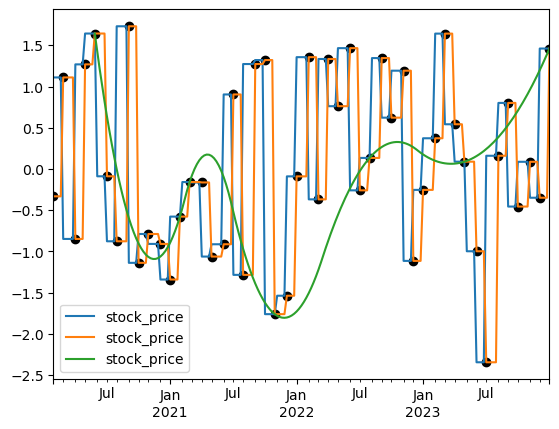

In [25]:
# create some time data
ts_data = pd.date_range("2020-01-01", "2023-12-31", freq='M')

ts_data

ts_df = pd.DataFrame(
    index = ts_data,
    columns = ['stock_price'],
    data=np.random.normal(size=len(ts_data))
    )

ts_df

ts_df.resample('Y').mean()

fig, ax = plt.subplots()

# ts_df.reset_index().plot(x= 'index',y='stock_price', ax=ax, color='black', ls='--')
ts_df.resample("W").bfill().plot(ax=ax)
ts_df.resample("W").ffill().plot(ax=ax)
ts_df.resample("W").interpolate('quadratic', order=25).plot(ax=ax)
ax.scatter(ts_df.index, ts_df['stock_price'], color='black')



### Changing Type  

- Sometimes you might want to change the type of a variable, like say changing a string of numbers to floats or integers, so you can use mathematical operations
- It's really as easy as `astype`

In [26]:
num_string_df = pd.DataFrame(
    columns= ['x'],
    data = ['1', '2', '3', '4']
)

num_string_df

,x
0,1
1,2
2,3
3,4


In [27]:
num_string_df.dtypes
# A string!

x    object
dtype: object

In [28]:
num_string_df['x']*2

0    11
1    22
2    33
3    44
Name: x, dtype: object

In [29]:
num_string_df['x'] + 1

TypeError: can only concatenate str (not "int") to str

In [35]:
num_string_df.assign(x_int = lambda df: df['x'].astype(int))['x_int'] + 1



0    2
1    3
2    4
3    5
Name: x_int, dtype: int64

In [43]:
df_1 = pd.DataFrame({'x' : [1,2,3,4], 'key' : ['a', 'b', 'c', 'e']})
df_2 = pd.DataFrame({'y' : [4,5,6,7], 'key' : ['a', 'b', 'c', 'f']})

df_1
df_2

,y,key
0,4,a
1,5,b
2,6,c
3,7,f


In [49]:
df_1.merge(df_2,
           how='cross',
           indicator=True)

,x,key_x,y,key_y,_merge
0,1,a,4,a,both
1,1,a,5,b,both
2,1,a,6,c,both
3,1,a,7,f,both
4,2,b,4,a,both
5,2,b,5,b,both
6,2,b,6,c,both
7,2,b,7,f,both
8,3,c,4,a,both
9,3,c,5,b,both


In [54]:
pd.concat([df_1, df_2], axis=1)

,x,key,y,key
0,1,a,4,a
1,2,b,5,b
2,3,c,6,c
3,4,e,7,f


## Recap

- We looked at different ways to use `pandas`
- In terms of data analysis, `pandas` is the main library to use
- You're not expected to memorize these functions or how to use them
- The most important thing to learn to do
    - Learn how to read errors
    - `KeyError`, `ValueError`, `TypeError`
    - Python shows you where the code broke
    - Check why things are not working
    - If you still can't figure it out, use slack
- **Learn to read documentation**
    - read the user guide: https://pandas.pydata.org/docs/user_guide/index.html
    - Read the API (fancy name for library function documentation)
        - https://pandas.pydata.org/docs/reference/index.html
- For those coming from R, stata or SAS:
    - https://pandas.pydata.org/docs/getting_started/index.html#coming-from


## Short Project Description

- Due Sep. 21 11:59pm
- A good time to spend thinking about your final project 
- Opportunity to get feedback on the idea and to think about feasibility/ time
- Even if we didn't cover a topic you're interested in, write an idea around it and I'll guide you on its feasibility.
- Come to office hours or slack me before due date and I can explain what we will do
- Or ask now!

From Canvas: 

> Please submit your empirical project's 1-page description (in text or PDF format) via Canvas. Please use a 12-point font and 1-inch margins. In your description, please address the following points:

1. What is the research question? Clearly and succinctly articulate the precise question your research project intends to answer. Please state this as a question (with a question mark) to clarify exactly what you are trying to answer.

2. What are the context, relevance, and motivation? Provide a short discussion of why you think this question is important. What are you interested in this? Why should others be interested in this question? Understanding why something is relevant generally requires some understanding of the context of a particular literature, so please provide some limited background if that helps you better articulate your motivation.

3. What datasets are needed? Provide a list of the dataset you have identified that you think you will be using in the project. It is fine if you don’t have settled on these yet. Providing a sense of what the dataset is for is also important. If we haven't covered a topic for data extraction yet, but you would like to use it, write it down and I'll comment on its feasibility.

4. What is your methodology or identification strategy? Provide an overview of the methods you will be using to answer the research question. Are you estimating a regression model?  If so, what is your identification strategy? Are you training a machine learning model? If so, tell me what you will be predicting. Are you running an optimization model or is your study mainly descriptive in nature?

5. What is your progress status and your goal for this class project? How far are you into this project? Have you made considerable progress? If so, please describe this and what you need to move forward. Also, be explicit about what you hope to achieve for this project in the course and the presentation context.
